# Project 1 - 와인 분류 최적화 프로젝트

## 1단계: 데이터 전처리 및 시각화

In [1]:
# 1단계-1번: 데이터 로드 및 train/test 분리

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 데이터 로드
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# 8:2 비율로 train/test 분리 (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"훈련 세트 크기: {X_train.shape[0]}")
print(f"테스트 세트 크기: {X_test.shape[0]}")

훈련 세트 크기: 142
테스트 세트 크기: 36


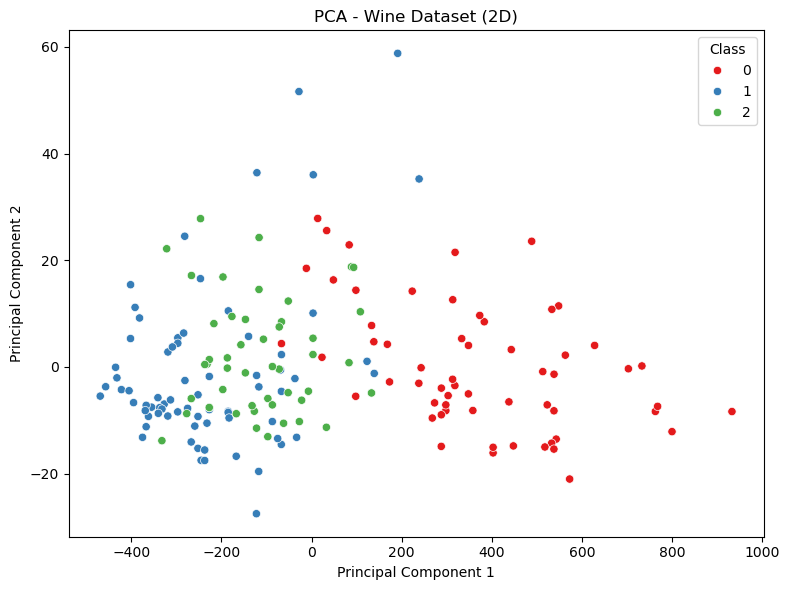

PCA 설명 분산 비율: [0.99809123 0.00173592]
총 설명 분산: 0.9998


In [2]:
# 1단계-2번: PCA 시각화 (2차원)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA - Wine Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

print(f"PCA 설명 분산 비율: {pca.explained_variance_ratio_}")
print(f"총 설명 분산: {sum(pca.explained_variance_ratio_):.4f}")

## 2단계: 정규화 여부에 따른 성능 비교

In [3]:
# 2단계-1번: 정규화 여부에 따른 KNN 성능 비교

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1) 정규화 없이 KNN 적용
knn_no_scale = KNeighborsClassifier()
knn_no_scale.fit(X_train, y_train)

# 예측 및 정확도 계산 (정규화 없음)
y_train_pred_no_scale = knn_no_scale.predict(X_train)
y_test_pred_no_scale = knn_no_scale.predict(X_test)

train_acc_no_scale = accuracy_score(y_train, y_train_pred_no_scale)
test_acc_no_scale = accuracy_score(y_test, y_test_pred_no_scale)

print("=== 정규화 없이 KNN 성능 ===")
print(f"훈련 데이터 정확도: {train_acc_no_scale:.4f}")
print(f"테스트 데이터 정확도: {test_acc_no_scale:.4f}")

# 2) 정규화 후 KNN 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

# 예측 및 정확도 계산 (정규화 후)
y_train_pred_scaled = knn_scaled.predict(X_train_scaled)
y_test_pred_scaled = knn_scaled.predict(X_test_scaled)

train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("\n=== 정규화 후 KNN 성능 ===")
print(f"훈련 데이터 정확도: {train_acc_scaled:.4f}")
print(f"테스트 데이터 정확도: {test_acc_scaled:.4f}")

print("\n=== 성능 비교 ===")
print(f"훈련 정확도 향상: {train_acc_scaled - train_acc_no_scale:.4f}")
print(f"테스트 정확도 향상: {test_acc_scaled - test_acc_no_scale:.4f}")

=== 정규화 없이 KNN 성능 ===
훈련 데이터 정확도: 0.7535
테스트 데이터 정확도: 0.7222

=== 정규화 후 KNN 성능 ===
훈련 데이터 정확도: 0.9859
테스트 데이터 정확도: 0.9444

=== 성능 비교 ===
훈련 정확도 향상: 0.2324
테스트 정확도 향상: 0.2222


## 3단계: 과대적합/과소적합 실험

In [4]:
# 3단계-1번: DecisionTreeClassifier와 Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

# Grid Search 실행
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("=== DecisionTreeClassifier Grid Search 결과 ===")
print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최적 교차 검증 점수: {grid_search.best_score_:.4f}")

# 최적 모델로 예측
best_dt = grid_search.best_estimator_
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"\n최적 모델 성능:")
print(f"훈련 데이터 정확도: {train_acc_dt:.4f}")
print(f"테스트 데이터 정확도: {test_acc_dt:.4f}")
print(f"훈련-테스트 정확도 차이: {train_acc_dt - test_acc_dt:.4f}")

# Bias-Variance Tradeoff 분석을 위한 조건 확인
print(f"\n=== Bias-Variance Tradeoff 분석 ===")
print(f"훈련 정확도: {train_acc_dt:.4f}")
print(f"테스트 정확도: {test_acc_dt:.4f}")
print(f"정확도 차이: {train_acc_dt - test_acc_dt:.4f}")

# 분석 조건
if train_acc_dt - test_acc_dt > 0.2:
    print("결론: 분산이 높음 (과적합)")
elif train_acc_dt < 0.9 and train_acc_dt - test_acc_dt < 0.05:
    print("결론: 편향이 높음 (과소적합)")
else:
    print("결론: 좋은 일반화 성능")

=== DecisionTreeClassifier Grid Search 결과 ===
최적 파라미터: {'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}
최적 교차 검증 점수: 0.9224

최적 모델 성능:
훈련 데이터 정확도: 0.9930
테스트 데이터 정확도: 0.9444
훈련-테스트 정확도 차이: 0.0485

=== Bias-Variance Tradeoff 분석 ===
훈련 정확도: 0.9930
테스트 정확도: 0.9444
정확도 차이: 0.0485
결론: 좋은 일반화 성능


## 4단계: 앙상블 모델 성능 실험

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [6]:
# 4단계-1번: RandomForestClassifier

print("=== RandomForestClassifier 성능 ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 훈련 및 테스트 정확도
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"훈련 데이터 정확도: {train_acc_rf:.4f}")
print(f"테스트 데이터 정확도: {test_acc_rf:.4f}")

# 4단계-2번: RandomForest 5-fold 교차 검증
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-fold 교차 검증 각 fold별 정확도:")
for i, score in enumerate(rf_cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"교차 검증 정확도 평균: {rf_cv_scores.mean():.4f}")

# 4단계-3번: GradientBoostingClassifier
print(f"\n=== GradientBoostingClassifier 성능 ===")
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# 훈련 및 테스트 정확도
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

train_acc_gb = accuracy_score(y_train, y_train_pred_gb)
test_acc_gb = accuracy_score(y_test, y_test_pred_gb)

print(f"훈련 데이터 정확도: {train_acc_gb:.4f}")
print(f"테스트 데이터 정확도: {test_acc_gb:.4f}")

# 4단계-4번: GradientBoosting 5-fold 교차 검증
gb_cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-fold 교차 검증 각 fold별 정확도:")
for i, score in enumerate(gb_cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"교차 검증 정확도 평균: {gb_cv_scores.mean():.4f}")

=== RandomForestClassifier 성능 ===
훈련 데이터 정확도: 1.0000
테스트 데이터 정확도: 1.0000

5-fold 교차 검증 각 fold별 정확도:
  Fold 1: 1.0000
  Fold 2: 1.0000
  Fold 3: 0.9286
  Fold 4: 0.9643
  Fold 5: 1.0000
교차 검증 정확도 평균: 0.9786

=== GradientBoostingClassifier 성능 ===
훈련 데이터 정확도: 1.0000
테스트 데이터 정확도: 0.9444

5-fold 교차 검증 각 fold별 정확도:
  Fold 1: 0.9655
  Fold 2: 0.9310
  Fold 3: 0.8929
  Fold 4: 0.8929
  Fold 5: 0.9286
교차 검증 정확도 평균: 0.9222


## 5단계: 최종 모델 선택 및 해석

In [7]:
# 전체 모델 성능 비교 요약
print(f"\n=== 전체 모델 성능 비교 ===")
print(f"KNN (정규화 후) - 훈련: {train_acc_scaled:.4f}, 테스트: {test_acc_scaled:.4f}")
print(f"DecisionTree - 훈련: {train_acc_dt:.4f}, 테스트: {test_acc_dt:.4f}")
print(f"RandomForest - 훈련: {train_acc_rf:.4f}, 테스트: {test_acc_rf:.4f}")
print(f"GradientBoosting - 훈련: {train_acc_gb:.4f}, 테스트: {test_acc_gb:.4f}")

print(f"\n=== 과적합 분석 (훈련-테스트 차이) ===")
print(f"KNN: {train_acc_scaled - test_acc_scaled:.4f}")
print(f"DecisionTree: {train_acc_dt - test_acc_dt:.4f}")
print(f"RandomForest: {train_acc_rf - test_acc_rf:.4f}")
print(f"GradientBoosting: {train_acc_gb - test_acc_gb:.4f}")


=== 전체 모델 성능 비교 ===
KNN (정규화 후) - 훈련: 0.9859, 테스트: 0.9444
DecisionTree - 훈련: 0.9930, 테스트: 0.9444
RandomForest - 훈련: 1.0000, 테스트: 1.0000
GradientBoosting - 훈련: 1.0000, 테스트: 0.9444

=== 과적합 분석 (훈련-테스트 차이) ===
KNN: 0.0415
DecisionTree: 0.0485
RandomForest: 0.0000
GradientBoosting: 0.0556


# Project 2. 당뇨병 진행도 예측 최적화 프로젝트

## 1단계: 데이터 전처리 및 시각화

In [8]:
# 1단계-1번: 데이터 로드 및 train/test 분리

from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# 데이터 로드
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

# DataFrame으로 변환 (시각화를 위해)
X_df = pd.DataFrame(X, columns=diabetes_data.feature_names)

print("Diabetes dataset info:")
print(f"Feature names: {diabetes_data.feature_names}")
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target 통계: min={y.min():.2f}, max={y.max():.2f}, mean={y.mean():.2f}")

# 8:2 비율로 train/test 분리 (random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n훈련 세트 크기: {X_train.shape[0]}")
print(f"테스트 세트 크기: {X_test.shape[0]}")

print(f"\n특성별 데이터 미리보기:")
print(X_df.head())

Diabetes dataset info:
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Data shape: (442, 10)
Target shape: (442,)
Target 통계: min=25.00, max=346.00, mean=152.13

훈련 세트 크기: 353
테스트 세트 크기: 89

특성별 데이터 미리보기:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


데이터셋 정보:
샘플 수: 442
특성 수: 10

특성 이름:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

처음 5개 샘플:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

각 특성과 타겟 변수 간의 상관관계 (내림차순):
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


<Figure size 2000x1500 with 0 Axes>

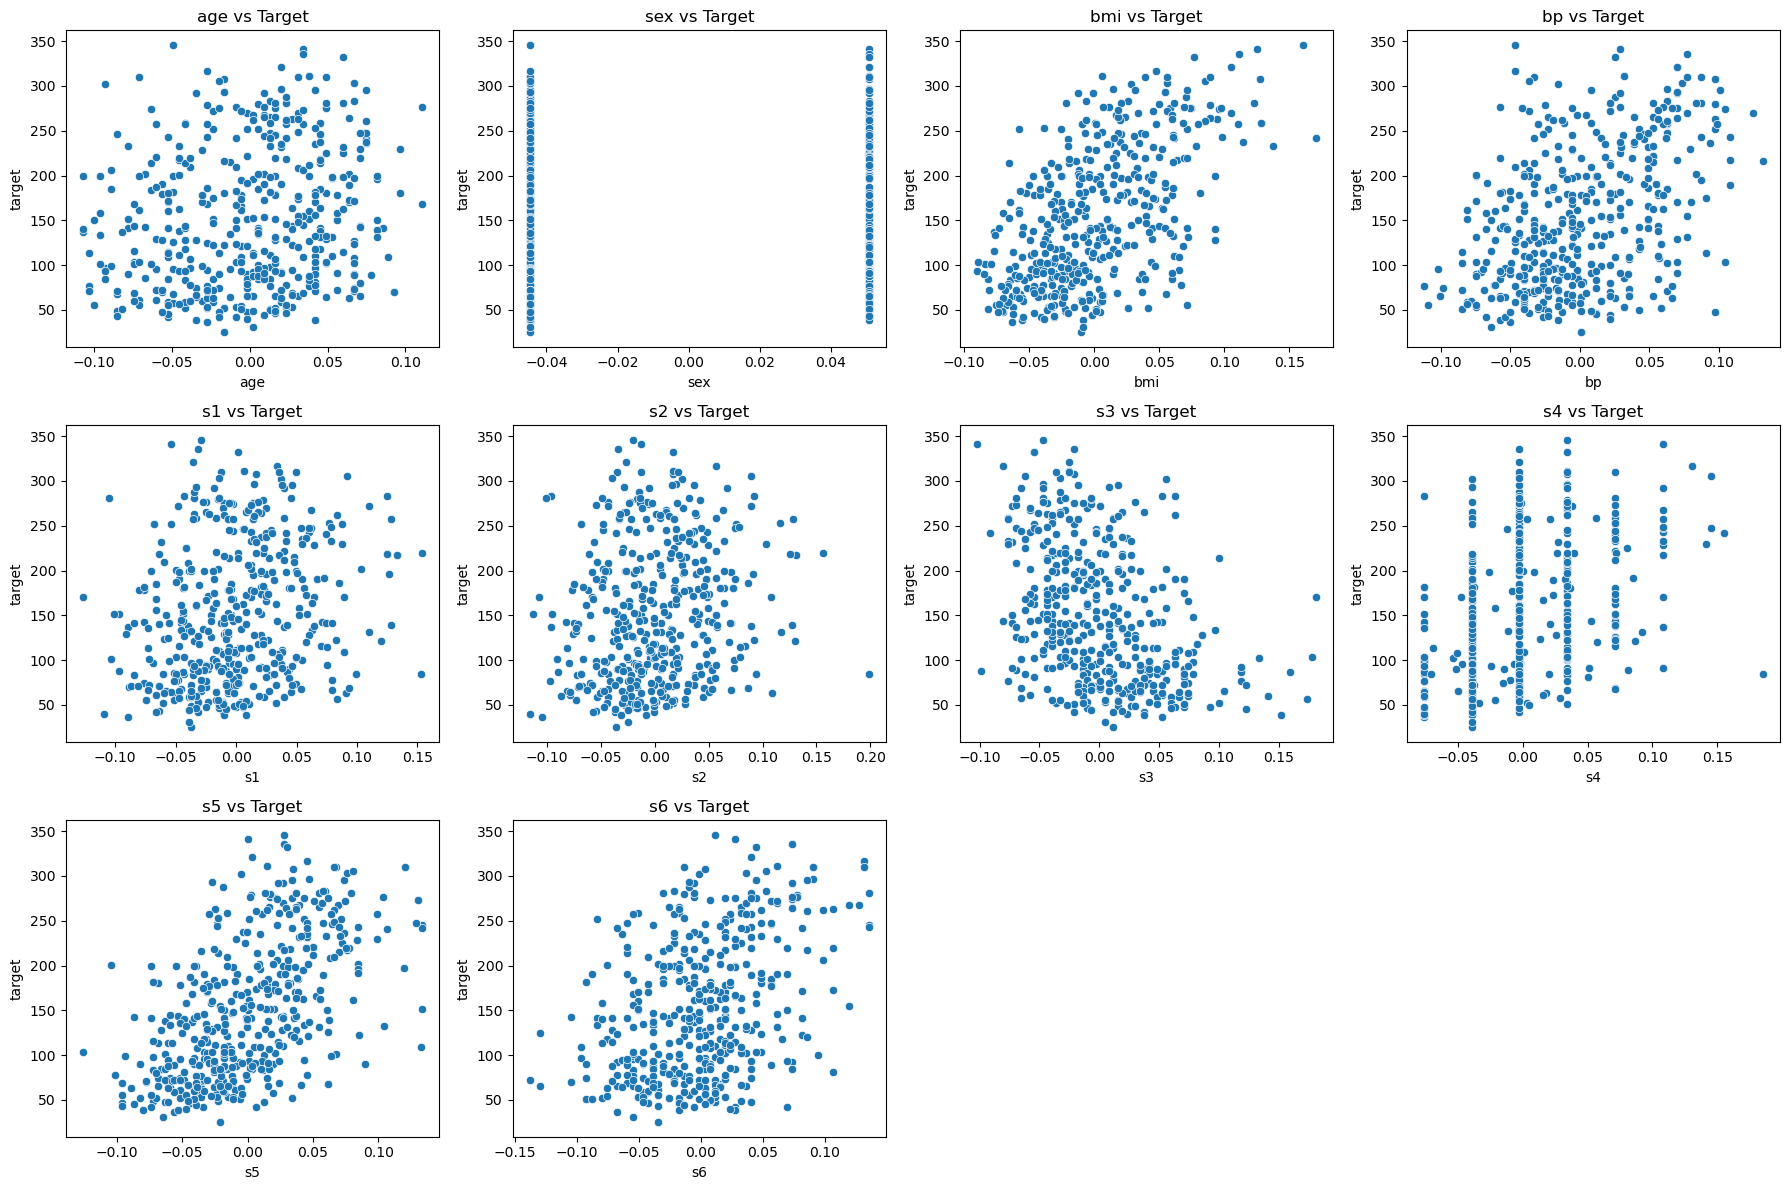

In [9]:
# 1단계-2번: 특성과 타겟 간의 관계를 scatterplot으로 시각화

from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 로드
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# 데이터 확인
print("데이터셋 정보:")
print(f"샘플 수: {X.shape[0]}")
print(f"특성 수: {X.shape[1]}")
print("\n특성 이름:")
print(X.columns.tolist())
print("\n처음 5개 샘플:")
print(X.head())

# 데이터프레임에 타겟 추가
df = X.copy()
df['target'] = y

# 각 특성과 타겟 간의 관계를 scatterplot으로 시각화
plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.ravel()  # 2D 배열을 1D로 평탄화

# 각 특성에 대한 산점도 생성
for idx, feature in enumerate(X.columns):
    if idx < len(axes):  # 인덱스가 axes 개수보다 작을 때만 실행
        sns.scatterplot(x=df[feature], y=df['target'], ax=axes[idx])
        axes[idx].set_title(f"{feature} vs Target", fontsize=12)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel("target")

# 상관관계 계수 계산 및 출력
correlations = df.corr()['target'].drop('target').sort_values(ascending=False)
print("\n각 특성과 타겟 변수 간의 상관관계 (내림차순):")
print(correlations)

# 사용하지 않는 서브플롯 제거
for idx in range(len(X.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 2단계: 정규화 여부에 따른 회귀 성능 비교

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 2단계-3번: StandardScaler 적용 유무에 따른 LinearRegression 성능 비교

# 1) 정규화 X LinearRegression
lr_no_scale = LinearRegression()
lr_no_scale.fit(X_train, y_train)

y_train_pred_no_scale = lr_no_scale.predict(X_train)
y_test_pred_no_scale = lr_no_scale.predict(X_test)

# 정규화 X - 성능 지표
r2_train_no_scale = r2_score(y_train, y_train_pred_no_scale)
r2_test_no_scale = r2_score(y_test, y_test_pred_no_scale)
mse_train_no_scale = mean_squared_error(y_train, y_train_pred_no_scale)
mse_test_no_scale = mean_squared_error(y_test, y_test_pred_no_scale)
mae_train_no_scale = mean_absolute_error(y_train, y_train_pred_no_scale)
mae_test_no_scale = mean_absolute_error(y_test, y_test_pred_no_scale)

print("=== 정규화 없이 LinearRegression 성능 ===")
print(f"훈련 데이터:")
print(f"  R² score: {r2_train_no_scale:.4f}")
print(f"  MSE: {mse_train_no_scale:.4f}")
print(f"  MAE: {mae_train_no_scale:.4f}")
print(f"테스트 데이터:")
print(f"  R² score: {r2_test_no_scale:.4f}")
print(f"  MSE: {mse_test_no_scale:.4f}")
print(f"  MAE: {mae_test_no_scale:.4f}")

# 2) 정규화 후 LinearRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

# 정규화 후 - 성능 지표
r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)
mse_train_scaled = mean_squared_error(y_train, y_train_pred_scaled)
mse_test_scaled = mean_squared_error(y_test, y_test_pred_scaled)
mae_train_scaled = mean_absolute_error(y_train, y_train_pred_scaled)
mae_test_scaled = mean_absolute_error(y_test, y_test_pred_scaled)

print(f"\n=== 정규화 후 LinearRegression 성능 ===")
print(f"훈련 데이터:")
print(f"  R² score: {r2_train_scaled:.4f}")
print(f"  MSE: {mse_train_scaled:.4f}")
print(f"  MAE: {mae_train_scaled:.4f}")
print(f"테스트 데이터:")
print(f"  R² score: {r2_test_scaled:.4f}")
print(f"  MSE: {mse_test_scaled:.4f}")
print(f"  MAE: {mae_test_scaled:.4f}")

print(f"\n=== 성능 비교 ===")
print(f"R² score 차이 (정규화 후 - 정규화 전):")
print(f"  훈련: {r2_train_scaled - r2_train_no_scale:.4f}")
print(f"  테스트: {r2_test_scaled - r2_test_no_scale:.4f}")
print(f"MSE 차이 (정규화 후 - 정규화 전):")
print(f"  훈련: {mse_train_scaled - mse_train_no_scale:.4f}")
print(f"  테스트: {mse_test_scaled - mse_test_no_scale:.4f}")

=== 정규화 없이 LinearRegression 성능 ===
훈련 데이터:
  R² score: 0.5279
  MSE: 2868.5497
  MAE: 43.4835
테스트 데이터:
  R² score: 0.4526
  MSE: 2900.1936
  MAE: 42.7941

=== 정규화 후 LinearRegression 성능 ===
훈련 데이터:
  R² score: 0.5279
  MSE: 2868.5497
  MAE: 43.4835
테스트 데이터:
  R² score: 0.4526
  MSE: 2900.1936
  MAE: 42.7941

=== 성능 비교 ===
R² score 차이 (정규화 후 - 정규화 전):
  훈련: 0.0000
  테스트: -0.0000
MSE 차이 (정규화 후 - 정규화 전):
  훈련: 0.0000
  테스트: 0.0000


## 3단계: 회귀 성능 향상 및 과대적합/과소적합 분석

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import loguniform

In [12]:
# 3단계-1번: Lasso regression (alpha=1.0)
print("=== 3단계-1번: Lasso Regression (alpha=1.0) ===")
lasso = Lasso(alpha=1.0, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print(f"훈련 데이터 R² score: {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"훈련 데이터 MSE: {mean_squared_error(y_train, y_train_pred_lasso):.4f}")
print(f"테스트 데이터 R² score: {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"테스트 데이터 MSE: {mean_squared_error(y_test, y_test_pred_lasso):.4f}")

# 3단계-2번: Lasso regression Grid Search
print(f"\n=== 3단계-2번: Lasso Regression Grid Search ===")
param_grid = {'alpha': np.logspace(-4, 0, 10)}
lasso_grid = Lasso(max_iter=10000, random_state=42)
grid_search_lasso = GridSearchCV(lasso_grid, param_grid, cv=5, scoring='r2')
grid_search_lasso.fit(X_train_scaled, y_train)

print(f"최적 alpha: {grid_search_lasso.best_params_['alpha']:.6f}")
print(f"교차 검증 R² score: {grid_search_lasso.best_score_:.4f}")

best_lasso_grid = grid_search_lasso.best_estimator_
train_pred_grid = best_lasso_grid.predict(X_train_scaled)
test_pred_grid = best_lasso_grid.predict(X_test_scaled)

print(f"훈련 데이터 R² score: {r2_score(y_train, train_pred_grid):.4f}")
print(f"훈련 데이터 MSE: {mean_squared_error(y_train, train_pred_grid):.4f}")
print(f"테스트 데이터 R² score: {r2_score(y_test, test_pred_grid):.4f}")
print(f"테스트 데이터 MSE: {mean_squared_error(y_test, test_pred_grid):.4f}")

# 3단계-3번: Lasso regression Random Search
print(f"\n=== 3단계-3번: Lasso Regression Random Search ===")
param_dist = {'alpha': loguniform(1e-4, 1e0)}
lasso_random = Lasso(max_iter=10000, random_state=42)
random_search_lasso = RandomizedSearchCV(lasso_random, param_dist, cv=5, scoring='r2', n_iter=20, random_state=42)
random_search_lasso.fit(X_train_scaled, y_train)

print(f"최적 alpha: {random_search_lasso.best_params_['alpha']:.6f}")
print(f"교차 검증 R² score: {random_search_lasso.best_score_:.4f}")

best_lasso_random = random_search_lasso.best_estimator_
train_pred_random = best_lasso_random.predict(X_train_scaled)
test_pred_random = best_lasso_random.predict(X_test_scaled)

print(f"훈련 데이터 R² score: {r2_score(y_train, train_pred_random):.4f}")
print(f"훈련 데이터 MSE: {mean_squared_error(y_train, train_pred_random):.4f}")
print(f"테스트 데이터 R² score: {r2_score(y_test, test_pred_random):.4f}")
print(f"테스트 데이터 MSE: {mean_squared_error(y_test, test_pred_random):.4f}")

=== 3단계-1번: Lasso Regression (alpha=1.0) ===
훈련 데이터 R² score: 0.5225
훈련 데이터 MSE: 2901.2161
테스트 데이터 R² score: 0.4669
테스트 데이터 MSE: 2824.5681

=== 3단계-2번: Lasso Regression Grid Search ===
최적 alpha: 1.000000
교차 검증 R² score: 0.4541
훈련 데이터 R² score: 0.5225
훈련 데이터 MSE: 2901.2161
테스트 데이터 R² score: 0.4669
테스트 데이터 MSE: 2824.5681

=== 3단계-3번: Lasso Regression Random Search ===
최적 alpha: 0.757948
교차 검증 R² score: 0.4536
훈련 데이터 R² score: 0.5236
훈련 데이터 MSE: 2894.5494
테스트 데이터 R² score: 0.4641
테스트 데이터 MSE: 2839.2925


## 4단계: 고급 모델 적용 및 평가

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [14]:
# 4단계-1번: RandomForestRegressor
print("1. RandomForestRegressor")

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV 설정 및 학습
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("\n최적 하이퍼파라미터 조합:", grid.best_params_)
print("최적 교차검증 평균 R²:", (grid.best_score_))

y_train_rf = best_rf.predict(X_train)
y_test_rf = best_rf.predict(X_test)

print(f"훈련 데이터 R²: {r2_score(y_train, y_train_rf):.4f}")
print(f"훈련 데이터 MSE: {mean_squared_error(y_train, y_train_rf):.4f}")
print(f"테스트 데이터 R²: {r2_score(y_test, y_test_rf):.4f}")
print(f"테스트 데이터 MSE: {mean_squared_error(y_test, y_test_rf):.4f}")

1. RandomForestRegressor

최적 하이퍼파라미터 조합: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최적 교차검증 평균 R²: 0.40787350023367475
훈련 데이터 R²: 0.7338
훈련 데이터 MSE: 1617.3334
테스트 데이터 R²: 0.4544
테스트 데이터 MSE: 2890.8083


In [15]:
# 4단계-2번: GradientBoostingRegressor

print("2. GradientBoostingRegressor")

# 하이퍼파라미터 그리드
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# GridSearchCV 설정 및 학습
grid = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_gb = grid.best_estimator_
print("\n최적 하이퍼파라미터 조합:", grid.best_params_)
print("최적 교차검증 평균 R²:", (grid.best_score_))

y_train_gb = best_gb.predict(X_train)
y_test_gb = best_gb.predict(X_test)

print(f"훈련 데이터 R²: {r2_score(y_train, y_train_gb):.4f}")
print(f"훈련 데이터 MSE: {mean_squared_error(y_train, y_train_gb):.4f}")
print(f"테스트 데이터 R²: {r2_score(y_test, y_test_gb):.4f}")
print(f"테스트 데이터 MSE: {mean_squared_error(y_test, y_test_gb):.4f}")

2. GradientBoostingRegressor

최적 하이퍼파라미터 조합: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
최적 교차검증 평균 R²: 0.3950127623860801
훈련 데이터 R²: 0.6330
훈련 데이터 MSE: 2230.0268
테스트 데이터 R²: 0.4597
테스트 데이터 MSE: 2862.8418
